# Parameterization with the Open Force Field Toolkit
This notebook shows how to use the API of `offpele` to parameterize a molecule with a force field from the Open Force Field initiative. Then, it generates the three files that PELE requires:
- Rotamer library
- Impact template
- Solvent parameters

## Example 1: benzene
This example shows how to load and parameterize the benzene molecule with `offpele`.

### Load the required classes from `offpele`'s API

In [1]:
from offpele.topology import Molecule, RotamerLibrary
from offpele.template import Impact
from offpele.solvent import OBC2

### Load `offpele`'s molecule representation with a PDB file of benzene

 - Loading molecule from RDKit


 - Generating rotamer library


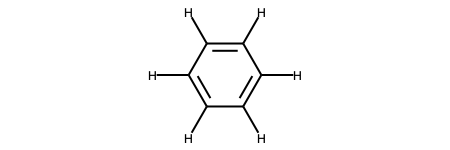

In [2]:
molecule = Molecule('BNZ.pdb')
display(molecule)

### Generate the Rotamer library file
The `RotamerLibrary` method handles the rotamer library generation. Here, we are generating it and saving it to a file named __BNZ.rot.assign__.

In [3]:
rotamer_library = RotamerLibrary(molecule)
rotamer_library.to_file('BNZ.rot.assign')

### Parameterize with Open Force Field Toolkit and generate the Impact template
Please, note that before generating the Impact template, we need to parameterize the molecule by calling the `Molecule.parameterize()` method.
Then, the Impact template, named __bnzz__, can be generated.

In [4]:
molecule.parameterize('openff_unconstrained-1.2.0.offxml')
impact = Impact(molecule)
impact.write('bnzz')

 - Loading forcefield
 - Computing partial charges with am1bcc


### Generate the Solvent parameters file
Please, note that before generating the Solvent parameters file, the molecule has to be previously parameterized. However, as we have already run the parameterization with `Molecule.parameterize()`, we can now skip this step because the molecule is already parameterized. Here, we generate the OBC2 Solvent parameters file, named __ligandParams.txt__.

In [5]:
solvent = OBC2(molecule)
solvent.to_json_file('ligandParams.txt')

 - Loading solvent parameters


## Example 2: oleic acid
This example shows how to load and parameterize the oleic acid molecule with `offpele` with some customized settings.

### Load the required classes from `offpele`'s API

In [6]:
from offpele.topology import Molecule, RotamerLibrary
from offpele.template import Impact
from offpele.solvent import OBC2

### Load `offpele`'s molecule representation with a PDB file of oleic acid

 - Loading molecule from RDKit
 - Generating rotamer library


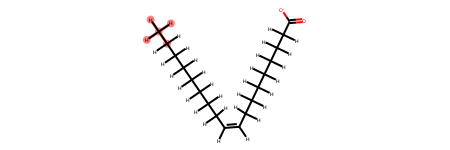

In [7]:
molecule = Molecule('OLC.pdb', rotamer_resolution=60)
display(molecule)

### Generate the Rotamer library file
We are generating the Rotamer library and saving it to a file named __OLC.rot.assign__. Please, note that in this case the employed rotamer resolution is 60 degrees because we set the __rotamer_resolution__ to __60__ when initializing the `Molecule` class.

In [8]:
rotamer_library = RotamerLibrary(molecule)
rotamer_library.to_file('OLC.rot.assign')

### Parameterize with Open Force Field Toolkit and generate the Impact template
Parameters from the __openff_unconstrained-1.2.0.offxml__ force field are assigned to the molecule. We can use another method to compute partial charges rather than the default one. Here, we are using the __gasteiger__ method. Then, the Impact template, named __olcz__, is generated.

In [9]:
molecule.parameterize('openff_unconstrained-1.2.0.offxml',
                      charges_method='gasteiger')
impact = Impact(molecule)
impact.write('olcz')

 - Loading forcefield
 - Computing partial charges with gasteiger


### Generate the Solvent parameters file
We generate the OBC2 Solvent parameters file, named __ligandParams.txt__.

In [10]:
solvent = OBC2(molecule)
solvent.to_json_file('ligandParams.txt')

 - Loading solvent parameters


## Example 3: anisole
This example shows how to load and parameterize the anisole molecule with `offpele` from a SMILES tag.

### Load the required classes from `offpele`'s API

In [11]:
from offpele.topology import Molecule, RotamerLibrary
from offpele.template import Impact
from offpele.solvent import OBC2

### Load `offpele`'s molecule representation with a PDB file of anisole

 - Constructing molecule from a SMILES tag with RDKit
 - Generating rotamer library


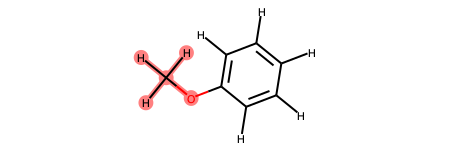

In [12]:
molecule = Molecule(smiles='COc1ccccc1')
display(molecule)

### Save PDB file for PELE
PELE still needs a PDB file to run a simulation. `offpele` can extract a PDB file with the structure of the molecule with PDB atom names correctly assigned.

In [13]:
molecule.to_pdb_file('ANI.pdb')

### Generate the Rotamer library file
We are generating the Rotamer library and saving it to a file named __ANI.rot.assign__.

In [14]:
rotamer_library = RotamerLibrary(molecule)
rotamer_library.to_file('ANI.rot.assign')

### Parameterize with Open Force Field Toolkit and generate the Impact template
Parameters from the __openff_unconstrained-1.2.0.offxml__ force field are assigned to the molecule. Then, the Impact template, named __aniz__, is generated.

In [15]:
molecule.parameterize('openff_unconstrained-1.2.0.offxml')
impact = Impact(molecule)
impact.write('aniz')

 - Loading forcefield
 - Computing partial charges with am1bcc


### Generate the Solvent parameters file
We generate the OBC2 Solvent parameters file, named ligandParams.txt.

In [16]:
solvent = OBC2(molecule)
solvent.to_json_file('ligandParams.txt')

 - Loading solvent parameters
